In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:
# Load data and select relevant columns
data = pd.read_csv("data/Spotify_Youtube.csv")
x = data[["Liveness", "Energy", "Loudness"]].dropna()

In [9]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

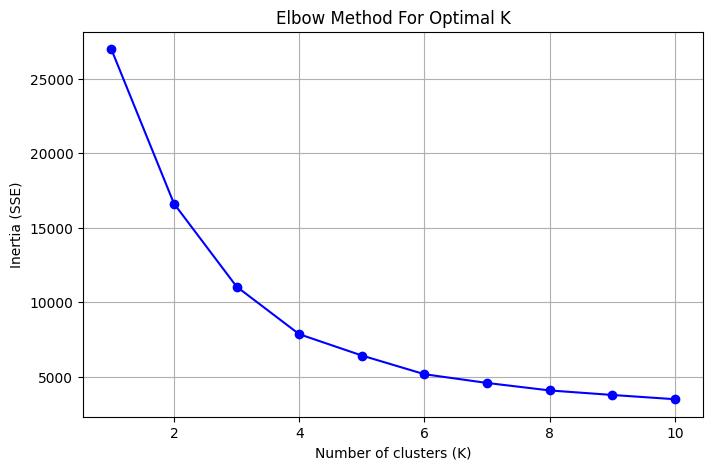

In [10]:
# Elbow method to find the optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [11]:
# Fit K-means with optimal K (update k_opt after checking Elbow graph)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, n_init=10, max_iter=300, random_state=42)
y_km = kmeans.fit_predict(x_scaled)

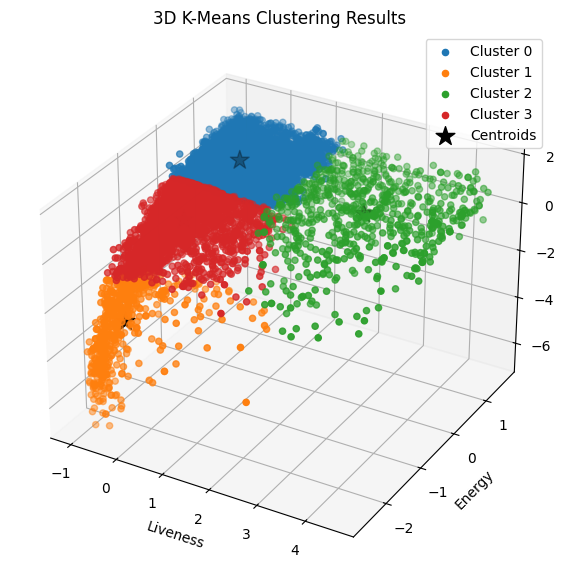

In [12]:
# 3D Visualization - K-Means
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(k_opt):
    cluster_points = x_scaled[y_km == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='black', marker='*', label='Centroids')

ax.set_xlabel('Liveness')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
ax.set_title('3D K-Means Clustering Results')
ax.legend()
plt.show()

## 📊 K-Means Clustering Analysis

We applied K-Means clustering to the 3D features `Liveness`, `Energy`, and `Loudness` extracted from Spotify-YouTube data. After standardizing the features, we used the elbow method to determine the optimal number of clusters, which was found to be **K = 4**.

The 3D scatter plot of K-Means clustering reveals distinct groupings in the data. Each cluster likely represents a group of songs with similar musical characteristics:

- **Cluster 0** may contain high-energy, loud, and live performance-style songs.
- **Cluster 1** could represent moderate energy and volume songs.
- **Cluster 2** might group mellow, low-energy tracks.
- **Cluster 3** may consist of highly produced but less live songs.

This clustering can potentially be used to group songs for recommendation systems or playlist generation.

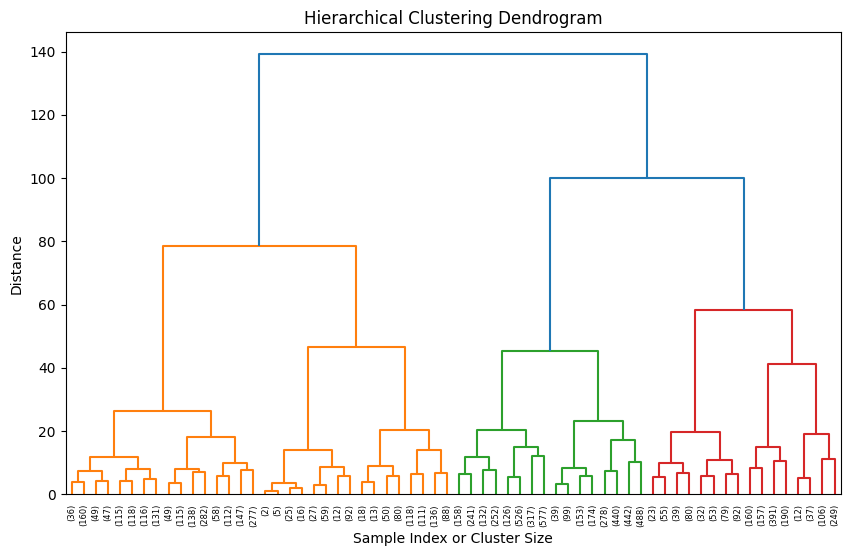

In [13]:
# Hierarchical Clustering - Dendrogram
linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [16]:
# Agglomerative Clustering - Assign clusters
hclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hclust.fit_predict(x_scaled)

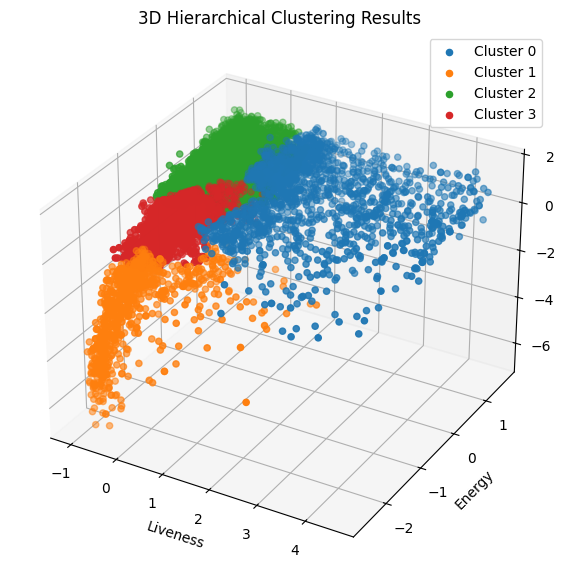

In [17]:
# 3D Visualization - Hierarchical Clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in np.unique(y_hc):
    cluster_points = x_scaled[y_hc == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

ax.set_xlabel('Liveness')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
ax.set_title('3D Hierarchical Clustering Results')
ax.legend()
plt.show()

## 🧬 Hierarchical Clustering Analysis

Hierarchical clustering was performed using Ward linkage on the same standardized 3D features. The dendrogram showed clear separation among clusters, also suggesting **4 distinct groups**, which aligns with the K-Means result.

Unlike K-Means, hierarchical clustering doesn't require pre-specifying K and provides insight into how clusters merge at different distance thresholds. This hierarchical structure is helpful for understanding nested relationships between musical features.

The 3D visualization further confirmed that the clusters generated from Agglomerative Clustering are consistent and interpretable.